## Loan Prediction Project

#### According to the past information of the person will predict whether or not to approve a loan by using binary classification problem.

### 1- Import libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### 2- Load and read data

In [176]:
df= pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [177]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [179]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [180]:
df.shape

(614, 13)

### 3- Preprocessing

In [181]:
#check missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [182]:
#make a copy for the dataset
df1=df.copy()

In [183]:
#filling LoanAmount missing value with mean 
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())

In [184]:
#filling Credit_History missing value with median
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].median())

In [185]:
#drop the missing value 
df1.dropna(inplace=True)

In [186]:
#check the missing value
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [187]:
#replace Loan_Status to numeric value. 
df1['Loan_Status'].replace('Y',1,inplace=True)
df1['Loan_Status'].replace('N',0,inplace=True)

### 4- EDA

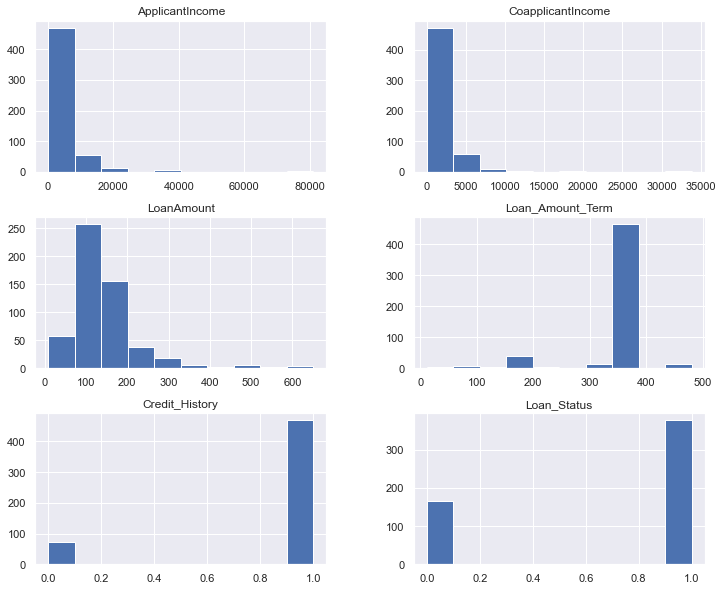

In [188]:
df1.hist(figsize=(12,10));

<AxesSubplot:title={'center':'Loan status'}, ylabel='Loan_Status'>

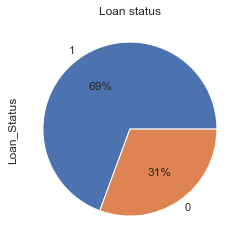

In [190]:
df1['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.0f%%' ,title='Loan status')

69% of request approved

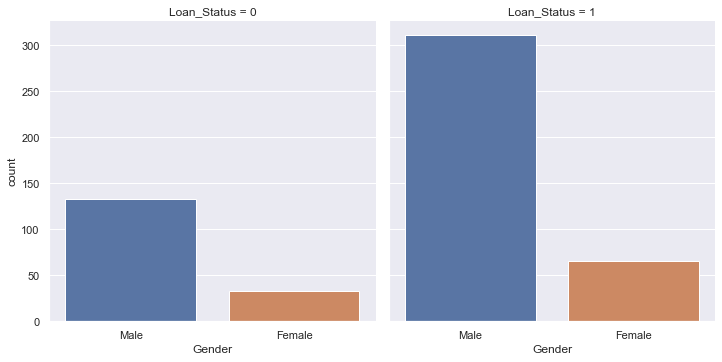

In [197]:
#Loan status by Gender
sns.catplot(x='Gender', col='Loan_Status', kind='count', data=df1);

Observe Males have highest number of loan approve

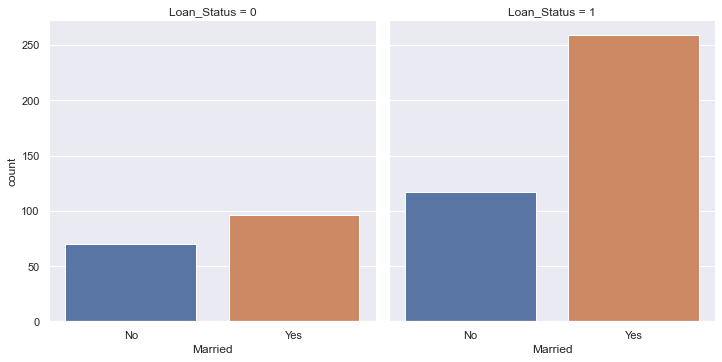

In [198]:
#Loan status by Married
sns.catplot(x='Married', col='Loan_Status', kind='count', data=df1);

Married have highest number of loan approve

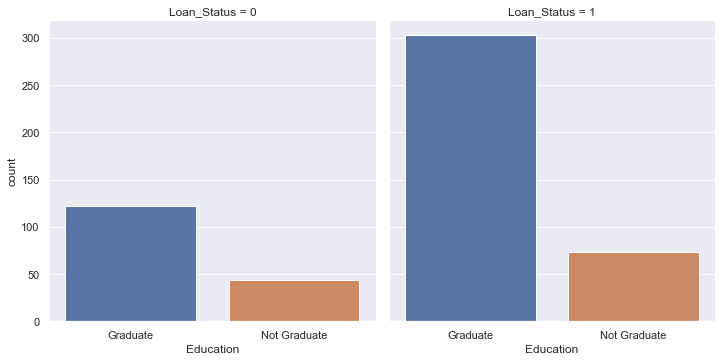

In [199]:
#Loan status by Education
sns.catplot(x='Education', col='Loan_Status', kind='count', data=df1);

Grduated have highest number of loan approve

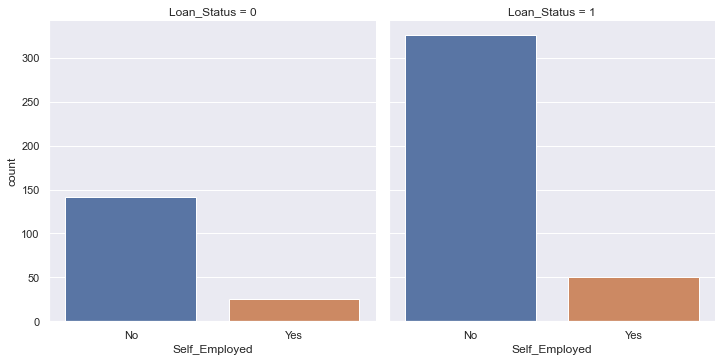

In [200]:
#Loan status by Self_Employed
sns.catplot(x='Self_Employed', col='Loan_Status', kind='count', data=df1);

Not self employed have highest number of loan approve

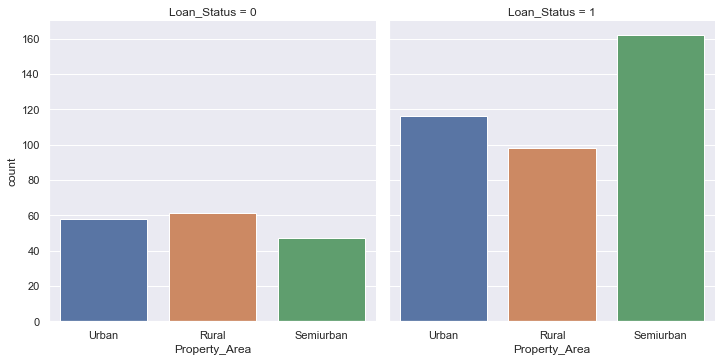

In [201]:
#Loan status by Property_Area
sns.catplot(x='Property_Area', col='Loan_Status', kind='count', data=df1);

Semiurban people have highest number of loan approve

Apply Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

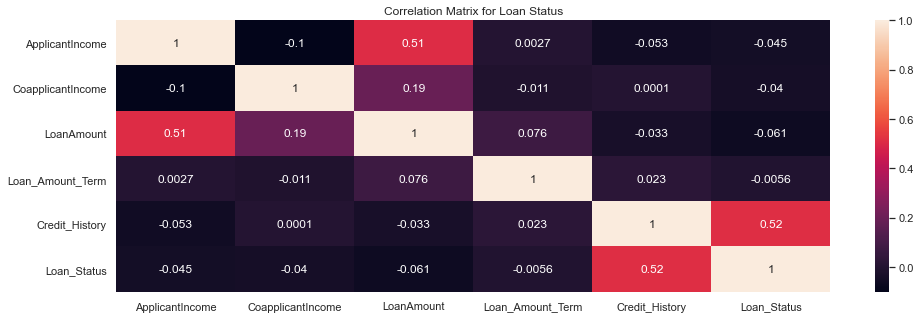

In [202]:
plt.figure(figsize=(16,5))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation Matrix for Loan Status')

From the above figure, we can see that Loan_Status is heavily dependent on the Credit_History

### 5- Model building

In [203]:
#replace the variable values to continues form (avoids disturbances in building the model)
le=LabelEncoder()
ohe=OneHotEncoder()
df1['Gender']=le.fit_transform(df1['Gender'])
df1['Married']=le.fit_transform(df1['Married'])
df1['Dependents']=le.fit_transform(df1['Dependents'])
df1['Education']=le.fit_transform(df1['Education'])
df1['Self_Employed']=le.fit_transform(df1['Self_Employed'])
df1['Property_Area']=le.fit_transform(df1['Property_Area'])
df1=pd.get_dummies(df1)

In [204]:
#split the data into train and test set
X=df1.drop('Loan_Status',1)
Y=df1['Loan_Status']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [205]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (433, 553)
Shape of X_test is:  (109, 553)
Shape of Y_train is:  (433,)
Shape of y_test is:  (109,)


In [206]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
pred = model.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8623853211009175

### Summary 
- Loan_Status is the dependence for loan approved
- Apply logistic regression with 86% accuracy